# **EC-416 Pattern Recognition Innovative Project**

# Topic:- Image Caption Generator using ResNet50 model and Neural Networks

## Name: -Aditya Agrawal
## Roll No: - DTU/2K17/EC/008

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# **START**

In [1]:
import time
prog_start=time.time()

## Importing Libraries

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from IPython.display import Image, display

In [3]:
from keras.preprocessing import image, sequence
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Input
from keras.layers import Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential,Model
from keras.utils import np_utils, plot_model

## Reading Flickr8 Dataset

In [4]:
# Load data
images_dir = os.listdir("../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Images")

images_path = '../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Images/'
captions_path = '../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
train_path = '../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt'
val_path = '../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.devImages.txt'
test_path = '../input/adityaflickr8k/Flickr8K/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")

In [5]:
# Loading captions as values and images as key in dictionary
tokens = {}

for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

In [6]:
print("Number of captions of captions array: -",len(captions))
print("Number of images in training dataset: -",len(x_train))
print("Number of images in validation dataset: -",len(x_val))
print("Number of images in testing dataset: -",len(x_test))

Number of captions of captions array: - 40461
Number of images in training dataset: - 6001
Number of images in validation dataset: - 1001
Number of images in testing dataset: - 1001


In [7]:
print("Elements in captions array\n")
print(*captions[5000:5005], sep='\n')

print("\nElements in x_train array\n")
print(random.choices(x_train, k=5))

print("\nElements in x_val array\n")
print(random.choices(x_val, k=5))

print("\nElements in x_test array\n")
print(random.choices(x_test, k=5))

Elements in captions array

2098646162_e3b3bbf14c.jpg#0	A black and gray cat stands on a contracption while two big dogs stare at it .
2098646162_e3b3bbf14c.jpg#1	Two black and white dogs are looking at a grey and white kitty .
2098646162_e3b3bbf14c.jpg#2	Two black and white dogs look at a kitten perched on some equipment .
2098646162_e3b3bbf14c.jpg#3	Two black and white dogs looking at a black and white kitten who is sitting on top of a tank with hoses on it .
2098646162_e3b3bbf14c.jpg#4	Two dogs are staring at a grey and white cat .

Elements in x_train array

['3465606652_f380a38050.jpg', '3030824089_e5a840265e.jpg', '1536597926_c2e1bc2379.jpg', '512550372_438849ce19.jpg', '2692635048_16c279ff9e.jpg']

Elements in x_val array

['3541491057_61a49588d9.jpg', '2574230252_f5a1382dd4.jpg', '414773731_c3f5bf43d5.jpg', '3234890865_bb3c316968.jpg', '2100046085_69b59b6645.jpg']

Elements in x_test array

['2621415349_ef1a7e73be.jpg', '1682079482_9a72fa57fa.jpg', '3657016761_d553e514d9.jpg', 

In [8]:
print("Example of captions for an image in tokens array: -\n")
tokens[random.choice(x_train)]

Example of captions for an image in tokens array: -



['A guy surfing .',
 'A male surfer in the air , leaving the water .',
 'An airborne man on a surfboard .',
 'A tanned wakeboarder is leaping high in the air .',
 'a young man on a white surfboard jumping over a huge wave']

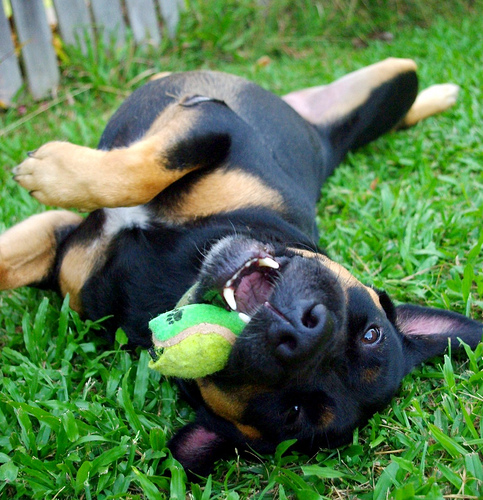

A dog plays with a toy in the grass .
A rotweiler playfully rolls over int he grass with a toy .
Black and tan dog playing with a toy and rolling on the grass .
Dog chewing up ball while rolling in grass
The dog is resting after a game of fetch .


In [9]:
# displaying an image and captions given to it
Pos = random.randrange(0, len(captions), 5)

temp = captions[Pos].split('#')   

z = Image(filename=images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print (tokens[temp[0]][ix])

## Saving Train, Test and Validation Dataset

In [10]:
# Creating train, test and validation dataset files with header as 'image_id' and 'captions'
train_dataset = open('./flickr_8k_train_dataset.txt','wb')
train_dataset.write(b"image_id\tcaptions\n")

val_dataset = open('./flickr_8k_val_dataset.txt','wb')
val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('./flickr_8k_test_dataset.txt','wb')
test_dataset.write(b"image_id\tcaptions\n")

18

In [11]:
# Populating the above created files for train, test and validation dataset with image ids and captions for each of these images
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> " + capt + " <end>"
        train_dataset.write((img + "\t" + caption + "\n").encode())
        train_dataset.flush()
train_dataset.close()

In [12]:
for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> " + capt + " <end>"
        test_dataset.write((img + "\t" + caption + "\n").encode())
        test_dataset.flush()
test_dataset.close()

In [13]:
for img in x_val:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> " + capt + " <end>"
        val_dataset.write((img + "\t" + caption + "\n").encode())
        val_dataset.flush()
val_dataset.close()

## Processing Images

In [14]:
ResNet50_Model_1 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224,3), pooling='avg')

ResNet50_Model_1.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

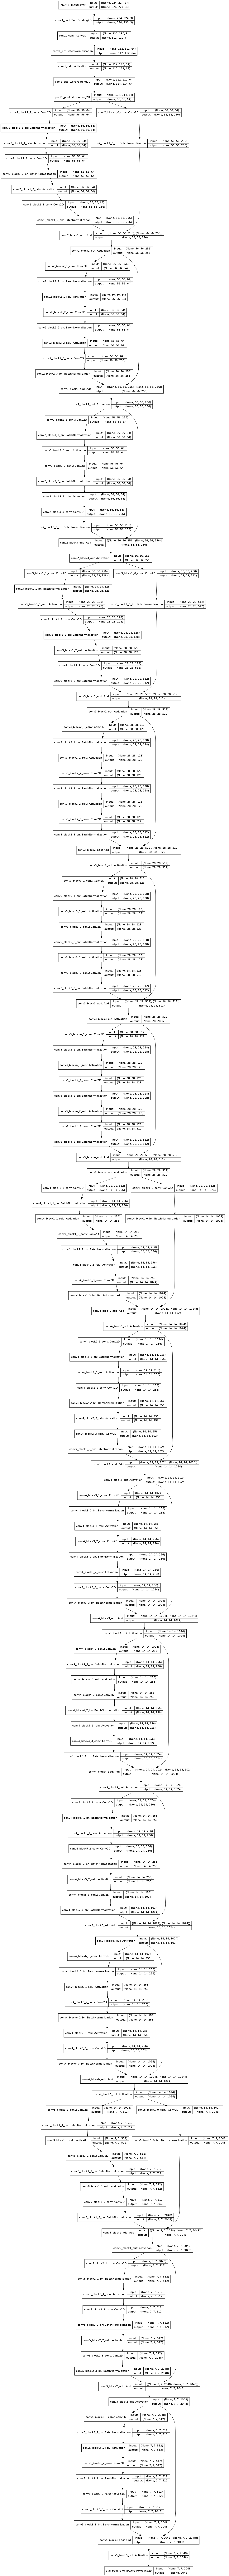

In [15]:
plot_model(ResNet50_Model_1, show_shapes=True, to_file="./ResNet50_Model_1.png")

In [16]:
# Helper function to process images
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [17]:
start_time_1 = time.time()

In [18]:
img_train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 3000:
        break
    ctr+=1
    if ctr%1000==0:
        print(ctr)
    path = images_path + ix
    img = preprocessing(path)
    pred = ResNet50_Model_1.predict(img).reshape(2048)
    img_train_data[ix] = pred
    print(ctr,end="\r")

1000
2000
3000


In [19]:
print("Time taken for processing images = %s minutes" % ((time.time() - start_time_1)/60))

Time taken for processing images = 3.0161260604858398 minutes


In [20]:
print("Shape of img_train_data for one image")
img_train_data['2513260012_03d33305cf.jpg'].shape

Shape of img_train_data for one image


(2048,)

In [21]:
# opening train_encoded_images.p file and dumping it's content
with open("./train_encoded_images.p", "wb") as pickle_f:
    pickle.dump(img_train_data, pickle_f)

## Reading Train Dataset and Extracting Unique Words

In [22]:
# Loading image and its corresponding caption into a dataframe and then storing values from dataframe into 'ds'
pd_dataset = pd.read_csv("./flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values
print("Shape of Train Dataframe: -",ds.shape)

Shape of Train Dataframe: - (30000, 2)


In [23]:
pd_dataset.head(15)

image_id  \
0   2513260012_03d33305cf.jpg   
1   2513260012_03d33305cf.jpg   
2   2513260012_03d33305cf.jpg   
3   2513260012_03d33305cf.jpg   
4   2513260012_03d33305cf.jpg   
5   2903617548_d3e38d7f88.jpg   
6   2903617548_d3e38d7f88.jpg   
7   2903617548_d3e38d7f88.jpg   
8   2903617548_d3e38d7f88.jpg   
9   2903617548_d3e38d7f88.jpg   
10  3338291921_fe7ae0c8f8.jpg   
11  3338291921_fe7ae0c8f8.jpg   
12  3338291921_fe7ae0c8f8.jpg   
13  3338291921_fe7ae0c8f8.jpg   
14  3338291921_fe7ae0c8f8.jpg   

                                             captions  
0   <start> A black dog is running after a white d...  
1   <start> Black dog chasing brown dog through sn...  
2   <start> Two dogs chase each other across the s...  
3   <start> Two dogs play together in the snow . <...  
4   <start> Two dogs running through a low lying b...  
5         <start> A little baby plays croquet . <end>  
6   <start> A little girl plays croquet next to a ...  
7   <start> The child is playing croquette by the ...  
8   <start> The kid is in front of a car with a pu...  
9   <start> The little boy is playing with a croqu...  
10  <start> A brown dog in the snow has something ...  
11  <start> A brown dog in the snow holding a pink...  
12  <start> A brown dog is holding a pink shirt in...  
13  <start> A dog is carrying something pink in it...  
14  <start> A dog with something pink in its mouth...

In [24]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix,1])
print ("Number of captions/sentences in train dataset: -",len(sentences))

print("\nElements in setences array: -\n")
print(*sentences[0:5], sep='\n')

Number of captions/sentences in train dataset: - 30000

Elements in setences array: -

<start> A black dog is running after a white dog in the snow . <end>
<start> Black dog chasing brown dog through snow <end>
<start> Two dogs chase each other across the snowy ground . <end>
<start> Two dogs play together in the snow . <end>
<start> Two dogs running through a low lying body of water . <end>


In [25]:
# Splitting each captions stored in 'sentences' and storing them in 'words' as list of list
words = [i.split() for i in sentences]

print("Elements in words array: -\n")
print(*words[0:5], sep='\n')

Elements in words array: -

['<start>', 'A', 'black', 'dog', 'is', 'running', 'after', 'a', 'white', 'dog', 'in', 'the', 'snow', '.', '<end>']
['<start>', 'Black', 'dog', 'chasing', 'brown', 'dog', 'through', 'snow', '<end>']
['<start>', 'Two', 'dogs', 'chase', 'each', 'other', 'across', 'the', 'snowy', 'ground', '.', '<end>']
['<start>', 'Two', 'dogs', 'play', 'together', 'in', 'the', 'snow', '.', '<end>']
['<start>', 'Two', 'dogs', 'running', 'through', 'a', 'low', 'lying', 'body', 'of', 'water', '.', '<end>']


In [26]:
# Creating a list of all unique words
unique = []
for i in words:
    unique.extend(i)
    
print("Total number of words (including duplicates) in train dataset: -",len(unique),'\n')
print("Elements in unique array: -\n")
print(*unique[0:25], sep='\n')

Total number of words (including duplicates) in train dataset: - 413377 

Elements in unique array: -

<start>
A
black
dog
is
running
after
a
white
dog
in
the
snow
.
<end>
<start>
Black
dog
chasing
brown
dog
through
snow
<end>
<start>


In [27]:
unique = list(set(unique))
print("Total number of unique words in train dataset: -",len(unique))

vocab_size = len(unique)

print("\nElements in unique array: -\n")
print(*unique[0:25], sep='\n')

Total number of unique words in train dataset: - 8253

Elements in unique array: -

brindle-coated
indoors
material
helicopter
protesters
regularly
bordering
hooking
scarily
critter
breaks
mostly
navel
lavender
crawling
closeup
join
Lean
justice
mud-wrestle
know
pianist
leaf
costumed
conical


In [28]:
#Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [29]:
print("Elements in word_2_indices dictionary: -\n")
print(dict(list(word_2_indices.items())[0: 5])) 

print("\nElements in indices_2_word dictionary: -\n")
print(dict(list(indices_2_word.items())[0: 5])) 

Elements in word_2_indices dictionary: -

{'brindle-coated': 0, 'indoors': 1, 'material': 2, 'helicopter': 3, 'protesters': 4}

Elements in indices_2_word dictionary: -

{0: 'brindle-coated', 1: 'indoors', 2: 'material', 3: 'helicopter', 4: 'protesters'}


In [30]:
#UNK - Unknown Word

word_2_indices['UNK'] = 0
word_2_indices['raining'] = 8253

indices_2_word[0] = 'UNK'
indices_2_word[8253] = 'raining'

In [31]:
print(word_2_indices['<start>'])
print(indices_2_word[4011])

print(word_2_indices['<end>'])
print(indices_2_word[8051])

4548
backpackers
6109
indescript


In [32]:
vocab_size = len(word_2_indices.keys())
print("Total number of unique words in train dataset: -",vocab_size)

Total number of unique words in train dataset: - 8254


In [33]:
#Max Length of Sentences
max_len = 0
#long=0
for i in sentences:
    i2 = i.split()
    if len(i2) > max_len:
        max_len = len(i2)
print("Length of longest caption: -",max_len)

Length of longest caption: - 40


## Creating Padded Sequences & Subsequent Words

In [34]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix,1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')
    
    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
    
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)


padded_sequences = np.asarray(padded_sequences,dtype=object)
subsequent_words = np.asarray(subsequent_words,dtype=object)

print("Shape of padded_sequences array",padded_sequences.shape)
print("Shape of subsequent_words array",subsequent_words.shape) 

Shape of padded_sequences array (30000,)
Shape of subsequent_words array (30000,)


In [35]:
idx= random.randrange(0, len(padded_sequences))
print("Example of a element in padded_sequences: -\n")
print(padded_sequences[idx])

Example of a element in padded_sequences: -

[[4548    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4548 6221    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4548 6221 4309    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4548 6221 4309 4960    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [4548 6221 4309 4960 7944    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    

In [36]:
for ix in range(len(padded_sequences[idx])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[idx][ix][iy]], end =" ")
    print("\n")

print(len(padded_sequences[idx]))

<start> UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A man UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A man waterskies UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A man waterskies with UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

<start> A man waterskies with a UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK

## Creating Arrays of Captions, Next Words, Images & Image Names

In [37]:
num_of_images = 2000 

In [38]:
start_time_2 = time.time()

In [39]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(num_of_images):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])
    print(ix,end="\r")

np.save("./captions.npy", captions)
np.save("./next_words.npy", next_words)

print("Shape of captions array: -",captions.shape)
print("Shape of next_words array: -",next_words.shape)

Shape of captions array: - (25493, 40)
Shape of next_words array: - (25493, 8254)


In [40]:
print("Time taken for creating captions and next_words array = %s minutes" % ((time.time() - start_time_2)/60))

Time taken for creating captions and next_words array = 10.649809038639068 minutes


In [41]:
with open('./train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")

In [42]:
print("No of encoded_images: -",len(encoded_images))

No of encoded_images: - 3000


In [43]:
imgs = []

for ix in range(ds.shape[0]):
    if ds[ix, 0] in encoded_images.keys():
        imgs.append(list(encoded_images[ds[ix, 0]])) 

imgs = np.asarray(imgs)
print("Shape of imgs array: -",imgs.shape)

Shape of imgs array: - (15000, 2048)


In [44]:
images = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("./images.npy", images)

print("Shape of images array: -",images.shape)

Shape of images array: - (25493, 2048)


In [45]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("./image_names.npy", image_names)

print("Shape of image_names array: -",image_names.shape)

Shape of image_names array: - (25493,)


## Creating Image Caption Generator Model

In [46]:
captions = np.load("./captions.npy")
next_words = np.load("./next_words.npy")
images = np.load("./images.npy")
imag = np.load("./image_names.npy")

print("Shape of captions array: -",captions.shape)
print("Shape of next_words array: -",next_words.shape)
print("Shape of images array: -",images.shape)
print("Shape of image_names array: -",imag.shape)

Shape of captions array: - (25493, 40)
Shape of next_words array: - (25493, 8254)
Shape of images array: - (25493, 2048)
Shape of image_names array: - (25493,)


In [47]:
embedding_size = 128
max_len = 40

In [48]:
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 40, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


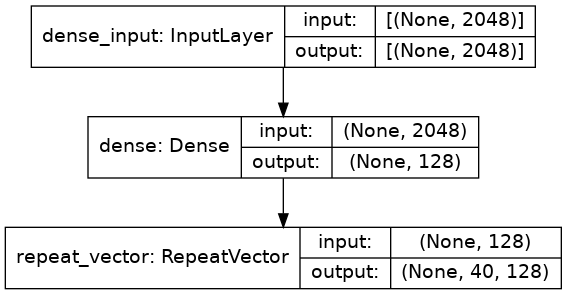

In [49]:
plot_model(image_model, show_shapes=True, to_file="./image_model.png")

In [50]:
language_model = Sequential()
language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 128)           1056512   
_________________________________________________________________
lstm (LSTM)                  (None, 40, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 40, 128)           32896     
Total params: 1,483,648
Trainable params: 1,483,648
Non-trainable params: 0
_________________________________________________________________


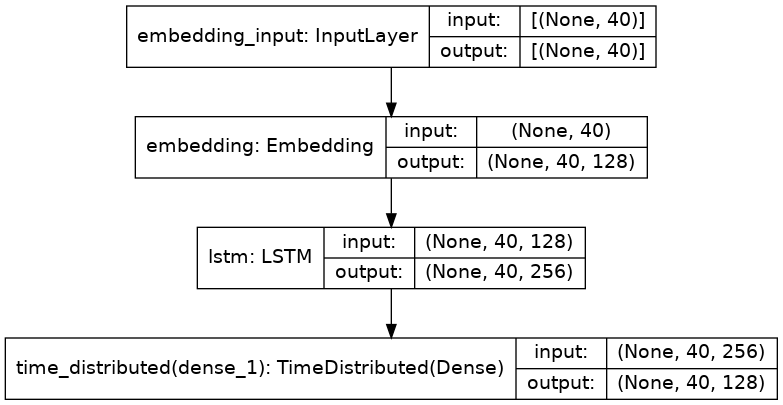

In [51]:
plot_model(language_model, show_shapes=True, to_file="./language_model.png")

In [52]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
Image_caption_model = Model(inputs=[image_model.input, language_model.input], outputs = out)

Image_caption_model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    
Image_caption_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    [(None, 40)]         0                                            
__________________________________________________________________________________________________
dense_input (InputLayer)        [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      1056512     embedding_input[0][0]            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          262272      dense_input[0][0]                
______________________________________________________________________________________________

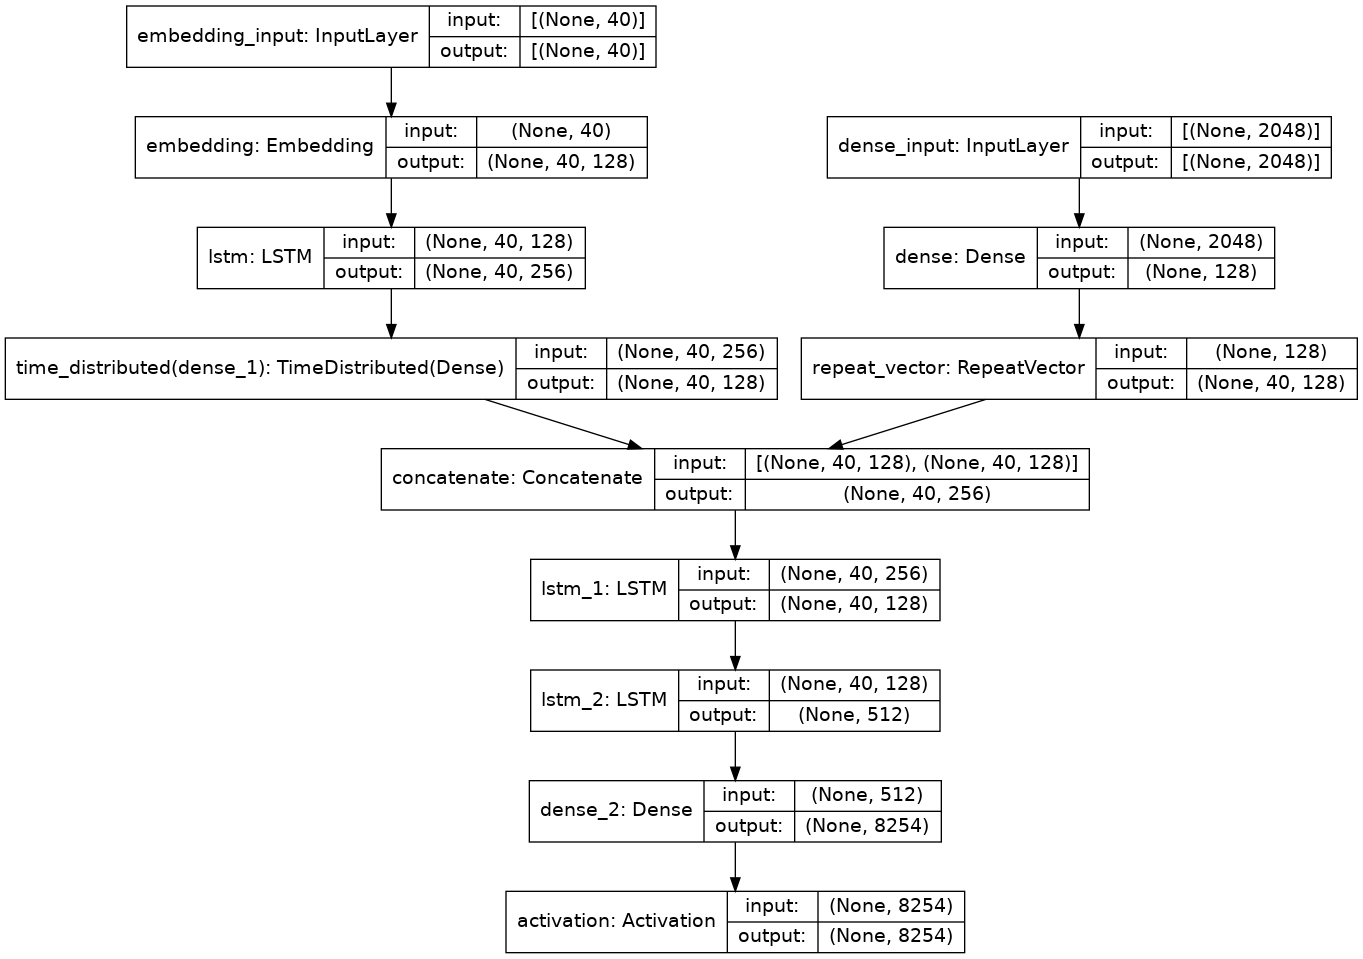

In [53]:
plot_model(Image_caption_model, show_shapes=True, to_file="./Image_caption_model.png")

In [54]:
start_time_3 = time.time()

In [55]:
hist = Image_caption_model.fit([images, captions], next_words, batch_size=512, epochs=200) 

Epoch 1/200
50/50 [==============================] - 9s 82ms/step - loss: 6.2475 - accuracy: 0.0663
Epoch 2/200
50/50 [==============================] - 4s 83ms/step - loss: 5.2820 - accuracy: 0.0897
Epoch 3/200
50/50 [==============================] - 4s 82ms/step - loss: 5.0451 - accuracy: 0.1146
Epoch 4/200
50/50 [==============================] - 4s 82ms/step - loss: 5.1925 - accuracy: 0.0746
Epoch 5/200
50/50 [==============================] - 4s 82ms/step - loss: 5.0645 - accuracy: 0.0909
Epoch 6/200
50/50 [==============================] - 4s 84ms/step - loss: 4.8936 - accuracy: 0.1163
Epoch 7/200
50/50 [==============================] - 4s 87ms/step - loss: 4.8128 - accuracy: 0.1186
Epoch 8/200
50/50 [==============================] - 4s 82ms/step - loss: 4.8592 - accuracy: 0.1068
Epoch 9/200
50/50 [==============================] - 4s 82ms/step - loss: 4.8734 - accuracy: 0.0961
Epoch 10/200
50/50 [==============================] - 4s 83ms/step - loss: 4.5986 - accuracy: 0.1302

In [56]:
print("Time taken to fit Image_caption_model = %s minutes" % ((time.time() - start_time_3)/60))

Time taken to fit Image_caption_model = 14.085781478881836 minutes


In [57]:
Image_caption_model.save_weights("./model_weights.h5")

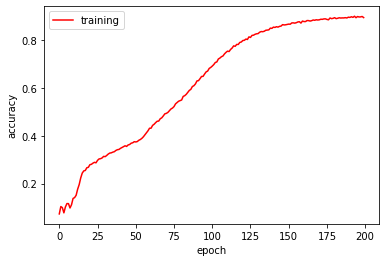

In [58]:
plt.figure(1)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'],'r')
plt.legend(['training'])
plt.savefig('./imgcap_accuarcy_plots.png')
plt.show()

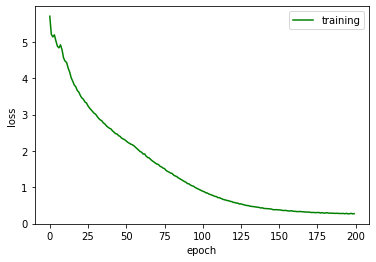

In [59]:
plt.figure(0)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist.history['loss'],'g')
plt.legend(['training'])
plt.savefig('./imgcap_loss_plots.png')
plt.show()

## Predicting Captions of Images

In [60]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [61]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [62]:
ResNet50_Model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [63]:
temp = plot_model(ResNet50_Model_2, show_shapes=True, to_file="./ResNet50_Model_2.png")

In [64]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = Image_caption_model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

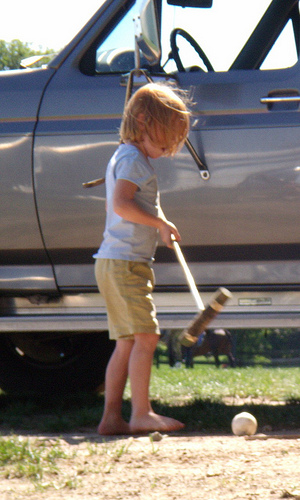

The child is playing croquette by the truck . 



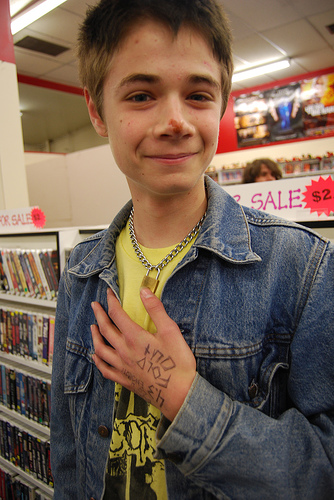

A boy wearing a jean jacket with his hand on his chest smiling at the camera . 



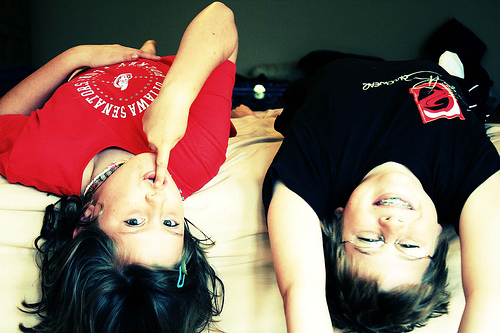

Two teen girls hang playfully from the side of the bed 



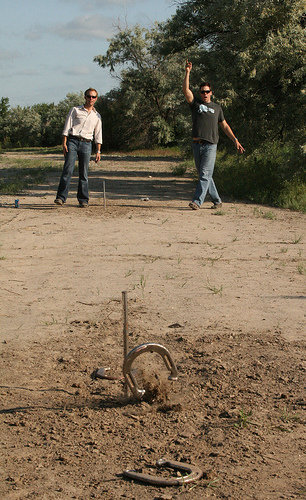

Two guys are playing horse shoe together . 



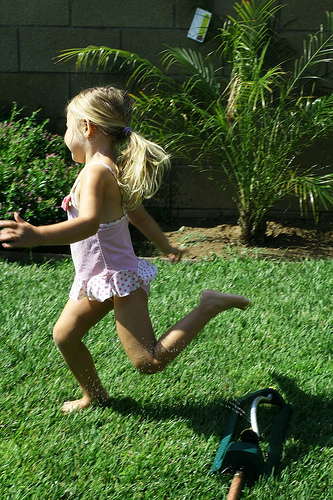

A little girl in pink in running through a sprinkler . 



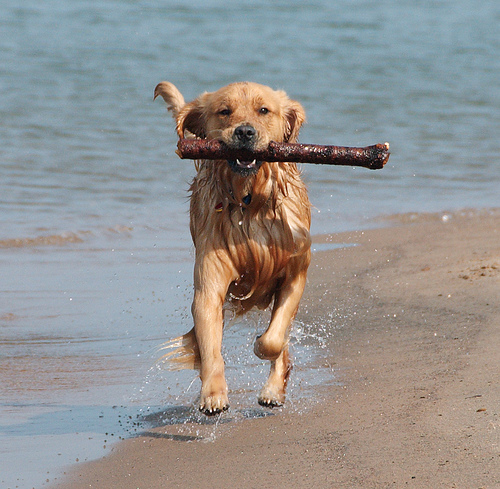

A brown dog is carrying a wet stick on the shore of the ocean . 



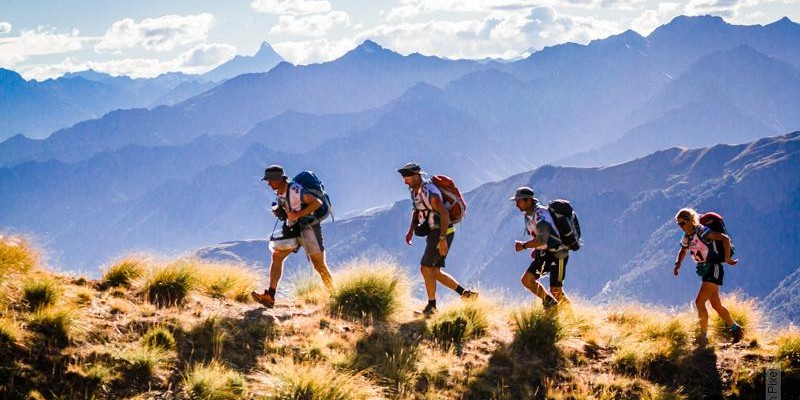

A skier does a flip over a hill in the ground . 



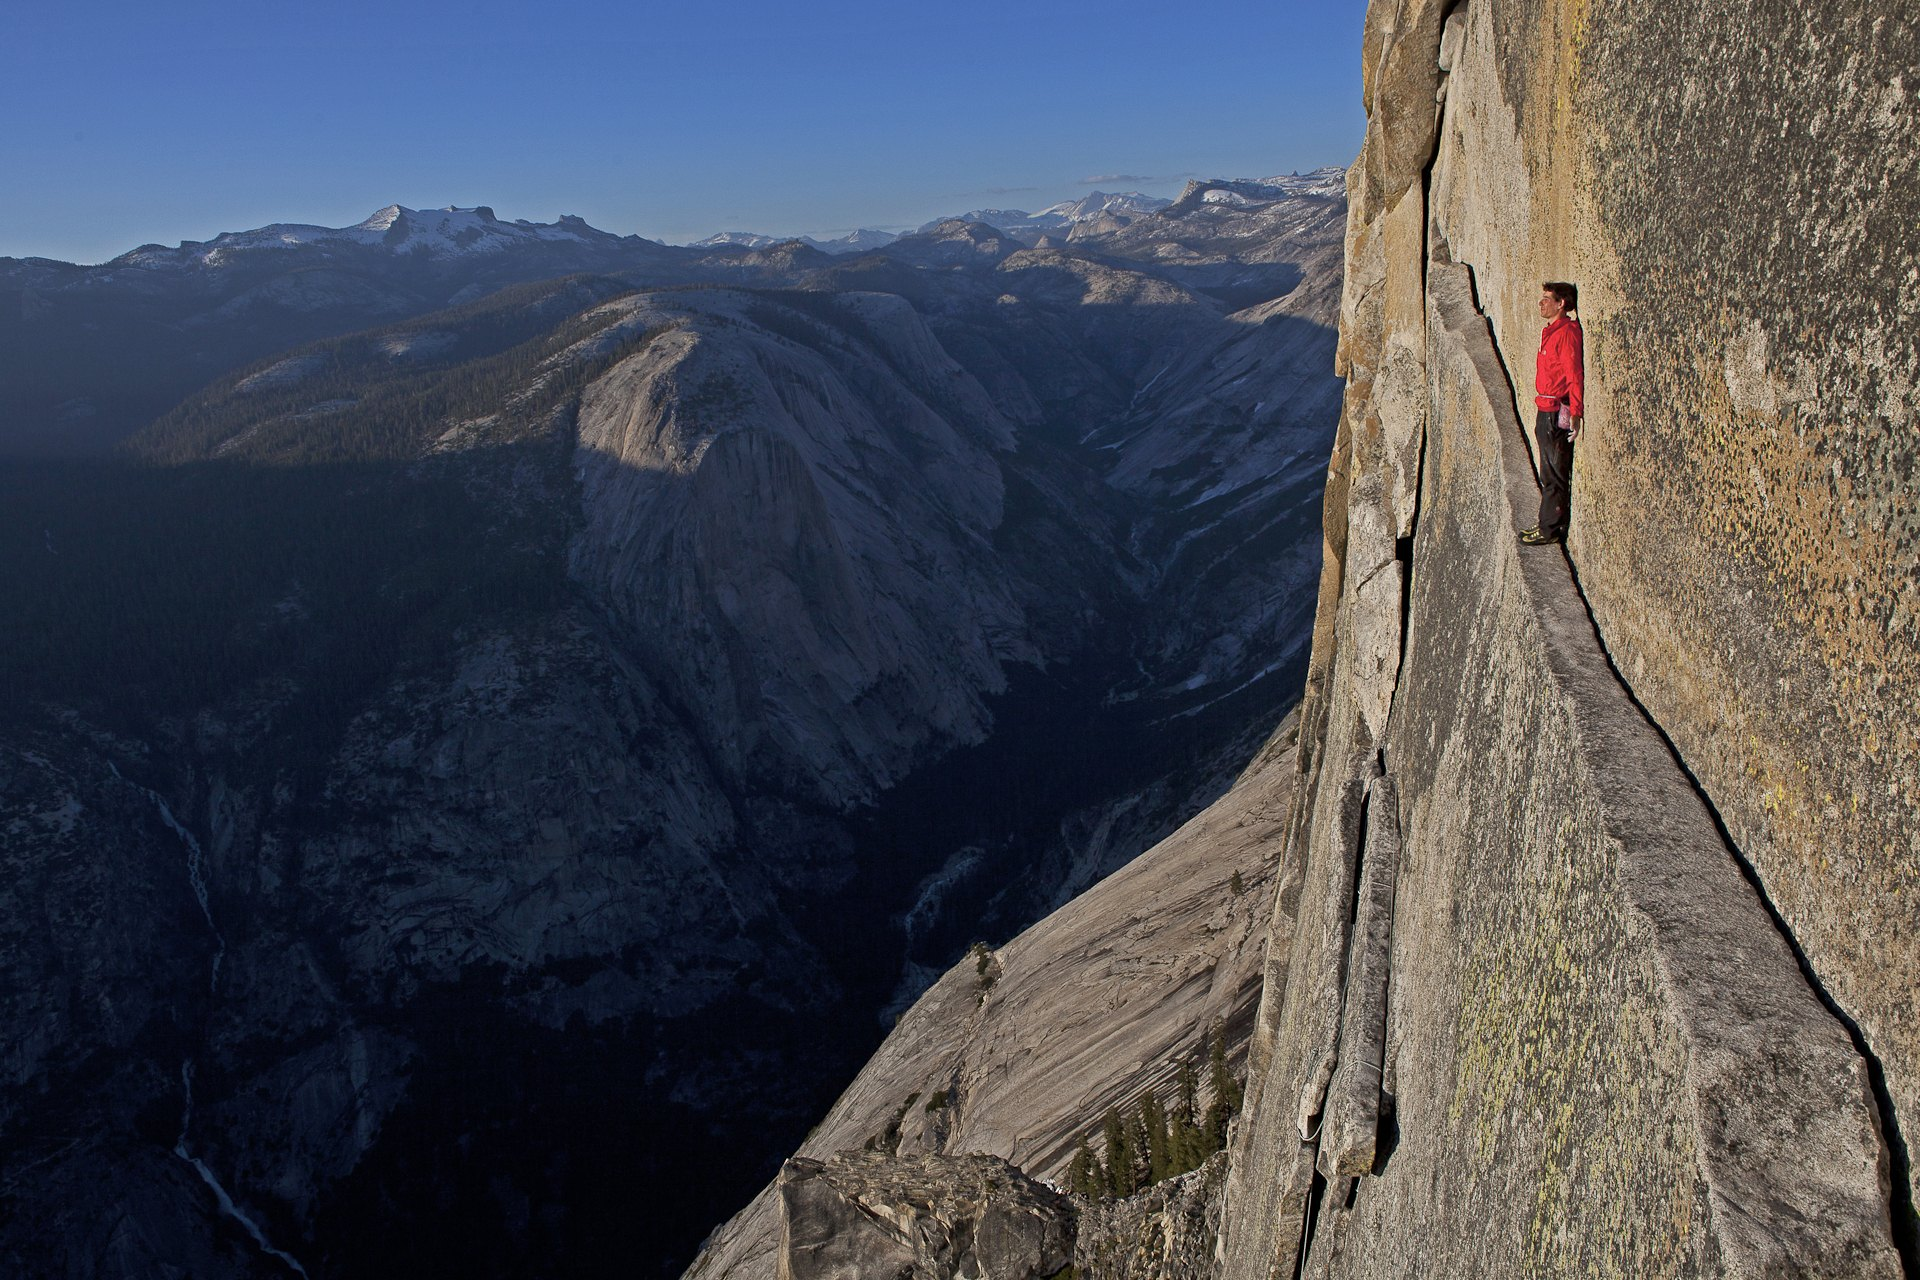

A man climbs up rocks of a mountain . 



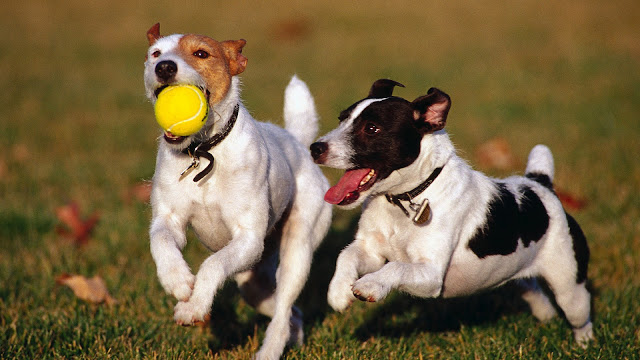

A brown and brown dog is running through the grass . 



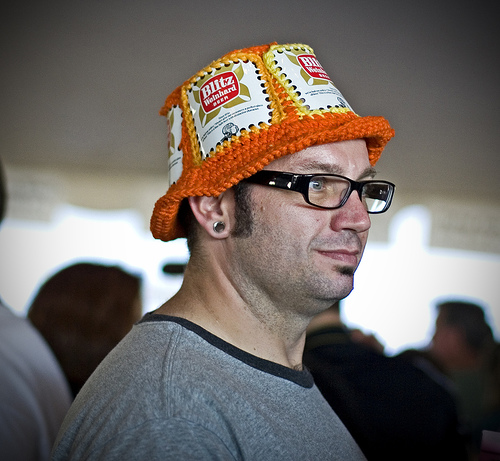

A man wearing a scarf and is hat looks to toboggan . 



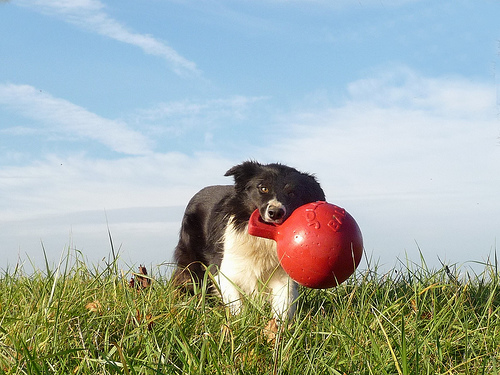

A black and white dog carries a red toy through the green grass . 



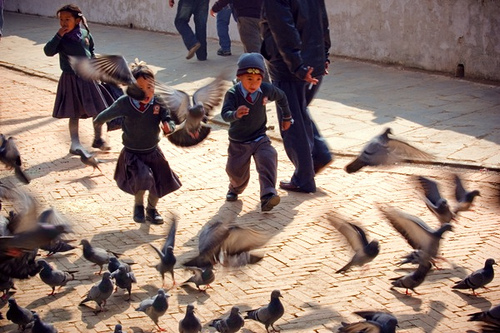

Children in uniforms chase pigeons . 



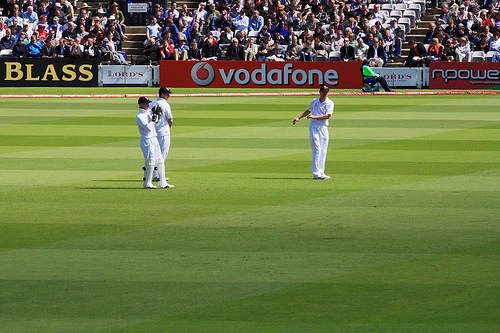

Three men stand on a sports field in front of a large crowd . 



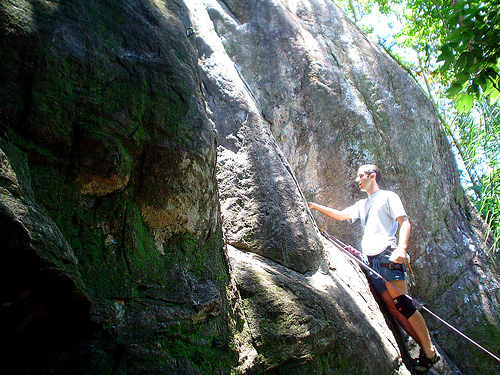

A man climbing a cliff with a rope . 



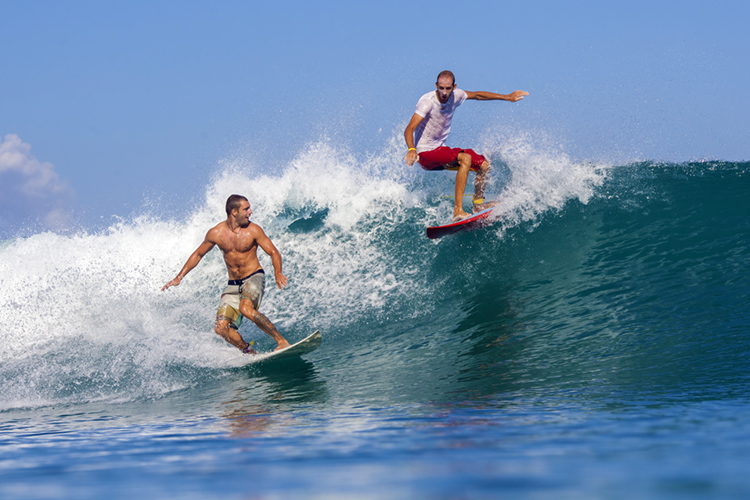

A person is sitting on a snowy snowy view in the mountain . 



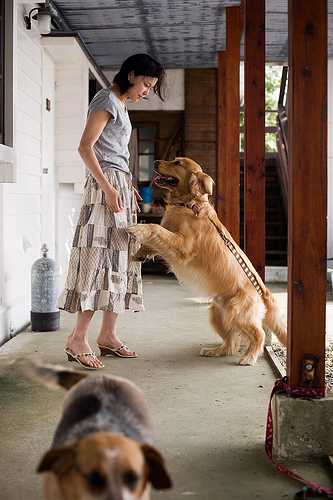

A tan dog jumping up at a woman in a skirt and a black and tan dog walking away . 



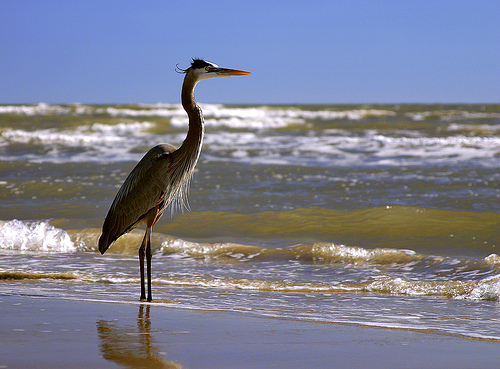

A grey bird stands majestically on a beach while waves roll in . 



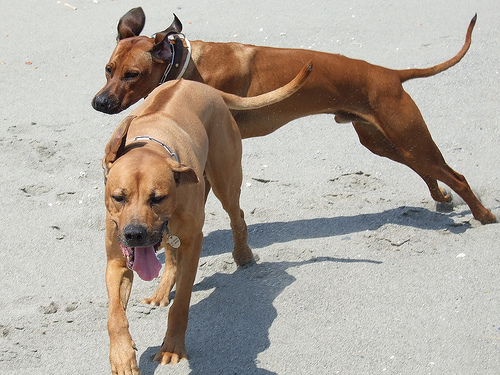

Two brown dogs on the sand 



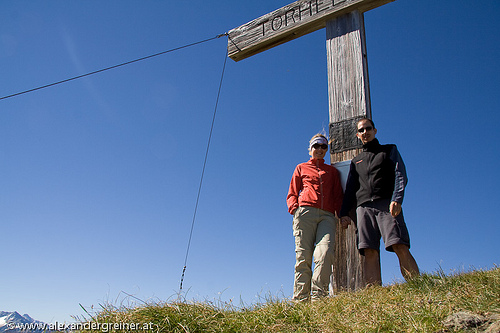

A boy is jumps down the steps . 



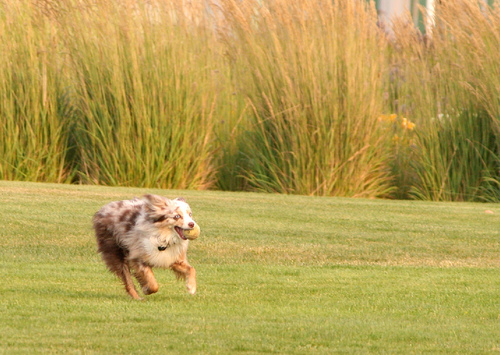

A dog with a ball that is running in a field . 



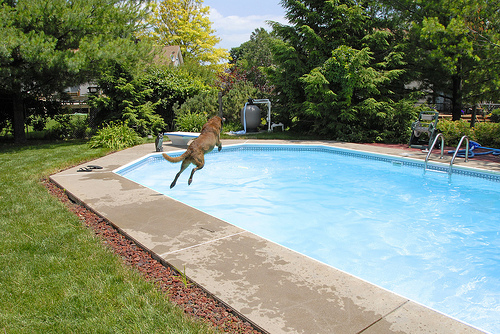

A dog in mid-leap into a pool . 



In [65]:
Test_images_path="../input/aditya-testing-images"
fileList = os.listdir(Test_images_path) 

for i in fileList: 
    
    img = Test_images_path + "/" + i

    z = Image(filename=img)
    display(z)
    
    test_img = get_encoding(ResNet50_Model_2, img)
    Argmax_Search = predict_captions(test_img)
    print(Argmax_Search,"\n")

In [66]:
print("Time taken for program in = %s minutes" % ((time.time() - prog_start)/60))

Time taken for program in = 30.86766403913498 minutes


# END